In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


In [6]:
ds12 = xr.open_dataset("../data/outputs/hs_effect/hₛ=0.2.nc")

ds12

<xarray.Dataset>
Dimensions:  (t: 1667, x: 90, y: 1)
Coordinates:
  * t        (t) float64 0.0 0.3 0.6 0.9 1.2 ... 498.6 498.9 499.2 499.5 499.8
  * x        (x) float64 -12.0 -11.2 -10.4 -9.6 -8.8 ... 56.8 57.6 58.4 59.2
  * y        (y) float64 0.0
Data variables:
    h        (y, x, t) float64 ...
    ux       (y, x, t) float64 ...
    uy       (y, x, t) float64 ...
    vx       (y, x, t) float64 ...
    vy       (y, x, t) float64 ...
    ϕxx      (y, x, t) float64 ...
    ϕxy      (y, x, t) float64 ...
    ϕyy      (y, x, t) float64 ...
Attributes: (12/18)
    tmax:           500
    μ:              0.001
    hₛ_ratio:       0.5
    hₛ:             0.2
    hdrop_std:      0.2
    θₛ:             30
    ...             ...
    ρ:              1000.0
    save_timestep:  0.3
    mass:           220
    dθₛ:            0
    θτ:             0.0
    aspect_ratio:   3

In [45]:
ds = ds12
hs = ds.attrs['hₛ']
hs_ratio = ds.attrs['hₛ_ratio']
aspect_ratio = ds.attrs['aspect_ratio']
L= ds.attrs['L']
h0 =  ds.attrs['h₀']
δ = 2 * hs / hs_ratio
N = round(1 + L / δ)
N

31

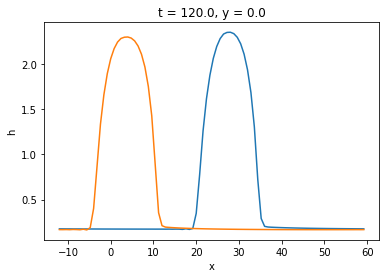

In [7]:
(ds12.h.isel(t=-1)).plot()
(ds12.h.isel(t=400)).plot()

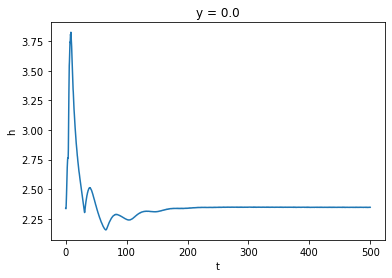

In [8]:
ds12.h.max(dim="x").plot()

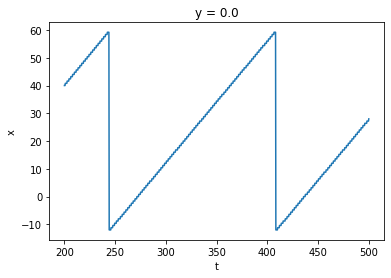

In [26]:
ds = ds12
# Attention de choisir un t assez grand pour éviter le changement de domaine
max_pos = ds.x.isel(x=ds.h.sel(y=0, method="nearest").argmax("x")).where(ds.t > 200, drop=True)
max_pos.plot()

In [47]:
ds = ds12
# Attention de choisir un t assez grand pour éviter le changement de domaine
max_pos = ds.x.isel(x=ds.h.sel(y=0, method="nearest").argmax("x")).where(ds.t > 200, drop=True)
c= float((2*L*aspect_ratio + max_pos.isel(t=-1) - max_pos.isel(t=0)) / (max_pos.isel(t=-1).t - max_pos.isel(t=0).t))
c

0.4404404404404404

In [12]:
donnees = ds12.h.isel(t=-1)
val = donnees.values[0]
xval = donnees.x.values
fichier = open("data.txt", "a")
i=0
while i < len(xval):
    fichier.write(str(xval[i])+"  ")
    fichier.write(str(val[i])+ "\n")
    i = i+1
fichier.close()